# Recognizing handwritten digits with scikit-learn

## Introduction

In this post, you will train a neural network to recognize handwritten digits. 

You will learn:  

* the principles of supervised machine learning for classification
* how to install easily the whole scientific python suite
* how to access and validate the training data for your network
* how to quantify the performance of your network
* how to tune your network to improve performance

This tutorial is meant for people with some basic knowledge of an object-oriented programming language. 
We will work in python, which is a wonderful choice for data science. If you're not a python developer but know a bit of C++ or java, for example, you'll be fine! And that will be an excellent occasion to get to know python and, who knows, fall in love with the snake?  

As far as maths are concerned, fear not. You do not need to know statistics, linear algebra, or whatever. If you understand what is a probability, you're all set. 


## Machine learning for classification

Given an image representing a digit, the network will try and classify the image in one of the following categories: 0, 1, 2, 3, 4, 5, 6, 7, 8, or 9. More precisely, the network will compute a probability for the image to belong to each of these categories, and we will select the category with the highest probability as the best estimate for this image. 


## Installing python and its scientific library

**if you're already running this tutorial in your jupyter notebook, please skip this section.**

We will use a variety of tools from scipy, the scientific python library: 

* scikit-learn: one of leading machine-learning toolkits for python. It will provide an easy access to the handwritten digits dataset, and allow us to define and train our neural network in a few lines of code
* numpy: core package providing powerful tools to manipulate data arrays, such as our digit images
* matplotlib: visualization tools, essential to check what we are doing
* jupyter: the web server that will allow you to follow this tutorial and run the code in your web browser. 

Scipy is actually not a single library, but an "ecosystem" of interdependent python packages.

This ecosystem is full of snakes and beasts fighting survival -- you do not want to hang in there alone.  

And indeed, six years ago, when I first got started with scipy, I tried to install manually all the packages I needed on top of the version of python already installed in my system. 

I spent almost a day fighting against conflicting dependencies for these packages. For example, scikit-learn might need numpy version A, but pandas needs numpy version B. Or, one of these packages requires a version of python more recent than the one you have, meaning that you need to install an additional version of python and deal with your two versions later on.   

And then, I discovered Anaconda. 

As stated on Anaconda's website: 

*With over 6 million users, the open source Anaconda Distribution is the fastest and easiest way to do Python and R data science and machine learning on Linux, Windows, and Mac OS X. It's the industry standard for developing, testing, and training on a single machine.*

In a nutshell, the anaconda team maintains a repository of more than 1400 data science packages, all compatible, and provides tools to install a version of python and these packages at the push of a button, and under five minutes. 

Let's do it now. 

First, [download anaconda](https://www.anaconda.com/download/) for your system: 

* Choose the python 2.X version, not the 3.X version.
* If you're using windows or linux, make sure to pick the 64bit installer if you have a 64bit system. 

Run the installer, and finally start the Anaconda Navigator. On windows, you can find it by clicking the windows start button, and typing anaconda. 

In the Anaconda Navigator window, click on the Home tab, and launch the jupyter notebook. 

Create a new notebook. In your notebook, you should see an empty cell, where you can write python code. Copy-paste the following lines, and execute the cell by pressing shift + enter.  

```python
print 'hello world!'
for i in range(10):
    print i
```

A new cell appears. Import numpy and matplotlib (remember that you need to execute the cell):

```python
import matplotlib.pyplot as plt 
import numpy as np 
```

This is a standard way to import these modules: 

* the pyplot module of matplotlib is called plt in this context
* the numpy module is called np 

You can very well choose other names, but these ones are used by almost everybody, so it's easier to use them as well. 

Now let's try and do our first plot, just to make sure that numpy and matplotlib are working:

```python 
# create an array with evenly spaced values, from 0 to 10 
x = np.linspace(0, 10, 11)
print x 
# create a new array. x**2 means that each element of x is squared
y = x**2
print y
# plot y versus x, you should get a parabola. check that for x = 1, y = 1, and that for x = 2, y = 4. 
plt.plot(x, y)
```

**A word of caution:**

It is easy to get lost in the documentation of all these tools, and to waste a lot of time. 

For example, if you check the documentation of the plt.plot method (I won't give you the link ;-) but you could google it), you will see that there are lots of ways to call it, with many optional parameters. But after all, do we need to know more than this: `plt.plot(x,y)` plots y vs x ? 

If you want to have fun, I suggest to follow this tutorial until the end without digging deeper. 

You'll train your first neural net easily and in the process, you'll get an understanding of the most important scikit-learn, numpy, and matplotlib tools. That's more than enough for a variety of machine learning tasks, and you can always learn more about specific features of these tools when you need them later on (you'll know!) 


## How does a neural network learn? 

**Drawing: digit, neural net, result**

Presented with an image of a digit, the network 

* Framing the problem: explain
    * what is a neural network
    * training
    * classification accuracy 


## The MNIST digits dataset

scikit-learn comes with several test datasets. Let's load the MNIST handwritten digits dataset, and let's print some information about this dataset:

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

In [6]:
print digits.DESCR

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In python, the `dir` function returns the names of the attributes of an object. Let's use this function to check what can be found in the digits object:

In [7]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

We have already printed DESCR, which is the description of the dataset. Let's have a look in more details at the other attributes. We are going to start by checking the type of each attribute:

In [30]:
for attr in dir(digits):
    print type(getattr(digits, attr))

<type 'str'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


data, images, target, and target names are all ndarrays (N-dimensional arrays) from the numpy package. The shape attribute of an ndarray gives the number of dimensions and the size along each dimension of the array. For example:

In [8]:
digits.images.shape

(1797L, 8L, 8L)

digits.image is an array with 3 dimensions. The first dimension indexes images, and we see that we have 1797 images in total. The next two dimensions correspond to the x and y coordinates of the pixels in each image. Each image has 8x8 = 64 pixels. In other words, this array could be represented in 3D as a pile of images with 8x8 pixels each. Let's plot the first image:

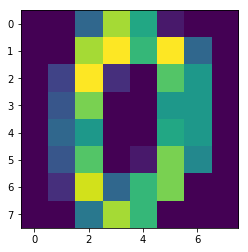

In [45]:
plt.imshow(digits.images[0])

In the same way, we can investigate the target attribute. It is a 1-dimensional array with 1797 slots. Looking into the array, we see that it contains the true numbers corresponding to each image. For example, the first target is 0, and corresponds to the image drawn just above.  

In [40]:
print digits.target.shape
print digits.target

(1797L,)
[0 1 2 ... 8 9 8]


Our brain is already trained to recognize a zero when looking at the image above because it was presented with many images of zeros in the past. In the same way, we will train an artificial neural network to recognize digits. At first, the neural network will not be able to recognize anything. To train it, we will present the network with an image from digits.image, together with the actual number this image is supposed to represent, from digits.target. But before doing that, let's have a look at some more images using this function: 

In [34]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j])
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

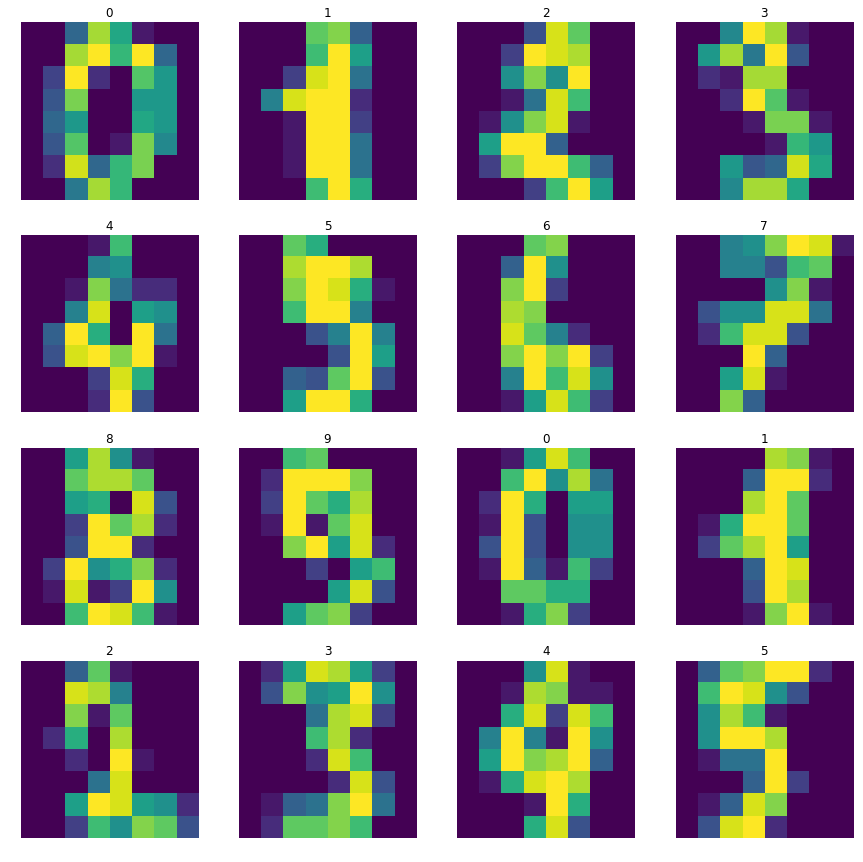

In [48]:
plot_multi(0)

you can have a look at the next digits by calling `plot_multi(16)`, `plot_multi(32)`, etc. You will probably see that with such a low resolution, it's quite difficult to recognize some of the digits, even for a human. In these conditions, our neural network will also be limited by the low quality of the input images. But can the neural network perform at least as well as a human? 